## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).


create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [3]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [2]:
import torch
torch.cuda.is_available()

False

In [6]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [8]:
y.backward()

In [10]:
x.grad

tensor([6.])

In [12]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [14]:
# your code here
x = torch.tensor([1., 2., 3.], requires_grad=True)
y=torch.sigmoid(x)
y.backward(torch.ones_like(x))
print(x.grad)
explicit=torch.sigmoid(x)*(1-torch.sigmoid(x))
print(explicit) 

tensor([0.1966, 0.1050, 0.0452])
tensor([0.1966, 0.1050, 0.0452], grad_fn=<MulBackward0>)


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [16]:
# your code here
print(x)
y = x 
y.backward
gx = x.grad
print(gx)
explicit = torch.ones_like(x)
print(explicit)

tensor([1., 2., 3.], requires_grad=True)
tensor([0.1966, 0.1050, 0.0452])
tensor([1., 1., 1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [18]:
# your code here
import numpy as np
x = torch.randn(3, requires_grad=True)
y = torch.nn.functional.relu(x)
gr = torch.autograd.grad(y,x,torch.ones_like(x))[0]
print(gr)
def relu(x):
    relurelu=[1 if value>0 else 0 for value in x]
    return np.array(relurelu,dtype=float)
explicit = relu(x)
print(explicit)

tensor([0., 0., 0.])
[0. 0. 0.]


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

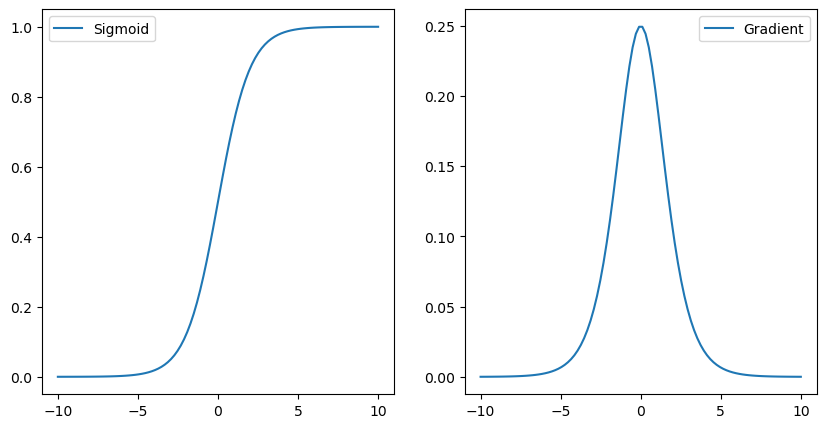

In [7]:
# your code here
import matplotlib.pyplot as plt
import torch 
x = torch.linspace(-10, 10, 100, requires_grad=True)
sigmoid = torch.sigmoid(x).detach().numpy()  
gradient = (torch.sigmoid(x) * (1 - torch.sigmoid(x))).detach().numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x.detach().numpy(), sigmoid, label="Sigmoid")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x.detach().numpy(), gradient, label="Gradient")
plt.legend()
plt.show()



Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

In [ ]:
# your code here
import matplotlib.pyplot as plt
import torch
x = torch.linspace(-10,10,100, requires_grad=True)
y_relu = torch.nn.functional.relu(x)
y_gradient = torch.autograd.grad(y_relu, x, torch.ones_like(y_relu))[0]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x.detach().numpy(), y_relu.detach().numpy(), label='ReLU')
plt.title('ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()
plt.plot(x.detach().numpy(), y_gradient.detach().numpy(), label='gradient')


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

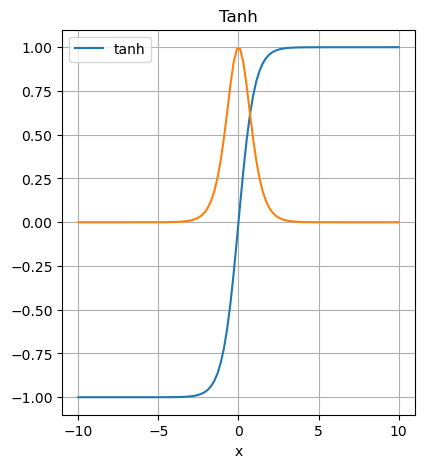

In [20]:
# your code here

x = torch.linspace(-10,10,100, requires_grad=True)
tanh=torch.tanh(x)
tanh_gr= torch.autograd.grad(tanh, x, torch.ones_like(tanh))[0]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x.detach().numpy(), tanh.detach().numpy(), label='tanh')
plt.title('Tanh')
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.plot(x.detach().numpy(), tanh_gr.detach().numpy(), label='gradient')

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

In [5]:
# your code here
x=torch.linspace(-10,10,100,requires_grad=True)
y=torch.nn.LeakyReLU(x)
gradient=torch.autograd.grad(y,x,torch.ones_like(y))
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plt(x.detach().numpy(), y.detach().numpy(), label="leaky relu")
plt.title("leaky relu")
plt.xlabel('x')
plt.legend()
plt.plot(x.detach().numpy(),gradient.detach().numpy(), label="gradient")

TypeError: ones_like(): argument 'input' (position 1) must be Tensor, not LeakyReLU

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [ ]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [ ]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


In [ ]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)  

X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) 
y_train = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)
input_size = 2
output_size = 1
perceptron = Perceptron(input_size, output_size)
criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(perceptron.parameters(), lr=0.1)  
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  
    outputs = perceptron(X_train)  
    loss = criterion(outputs, y_train)  
    loss.backward()  
    optimizer.step() 
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad(): 
    test_outputs = perceptron(X_train)
    predictions = torch.sigmoid(test_outputs)  
    predicted_labels = (predictions >= 0.5).float()  

    accuracy = (predicted_labels == y_train).float().mean() * 100
    print(f'final accuracy: {accuracy.item():.2f}%')

    print("predictions:", predicted_labels.squeeze().tolist())

Epoch [100/1000], Loss: 0.3245
Epoch [200/1000], Loss: 0.2555
Epoch [300/1000], Loss: 0.2095
Epoch [400/1000], Loss: 0.1768
Epoch [500/1000], Loss: 0.1524
Epoch [600/1000], Loss: 0.1337
Epoch [700/1000], Loss: 0.1188
Epoch [800/1000], Loss: 0.1067
Epoch [900/1000], Loss: 0.0968
Epoch [1000/1000], Loss: 0.0885
final accuracy: 100.00%
predictions: [0.0, 1.0, 1.0, 1.0]
